# KDD Cup 99

http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between ''bad'' connections, called intrusions or attacks, and ''good'' normal connections.


### Get training data

Note: we only use 10% data.


In [0]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz

--2020-04-26 13:17:43--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: ‘kddcup.data_10_percent.gz’

kddcup.data_10_perc 100%[===================>]   2.04M  1.99MB/s    in 1.0s    

2020-04-26 13:17:45 (1.99 MB/s) - ‘kddcup.data_10_percent.gz’ saved [2144903/2144903]



In [0]:
!gzip -d kddcup.data_10_percent.gz

In [0]:
!ls -al

total 73152
drwxr-xr-x 1 root root     4096 Apr 26 13:17 .
drwxr-xr-x 1 root root     4096 Apr 26 13:14 ..
drwxr-xr-x 1 root root     4096 Apr 23 16:11 .config
-rw-r--r-- 1 root root 74889749 Jun 26  2007 kddcup.data_10_percent
drwxr-xr-x 1 root root     4096 Apr  3 16:24 sample_data


### Read data

https://shodhganga.inflibnet.ac.in/bitstream/10603/9850/8/08_chapter%203.pdf

In [0]:
import pandas as pd

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
  
kdd_data_10percent_origin = pd.read_csv("/content/kddcup.data_10_percent", header=None, names = col_names)
print(kdd_data_10percent_origin.shape)

(494021, 42)


In [0]:
# hack !!!!!
# use even less data again, because this script may run slow
# here, you can only use a small portion of data
# I set it to 0.05

kdd_data_10percent = kdd_data_10percent_origin.sample(frac=0.05)
print(kdd_data_10percent.shape)

(24701, 42)


In [0]:
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
444930,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
366176,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,5,1.0,1.0,0.0,0.0,0.02,0.06,0.0,255,5,0.02,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
15647,0,tcp,smtp,SF,950,339,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,117,208,0.95,0.02,0.01,0.01,0.0,0.0,0.0,0.0,normal.
133940,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
400250,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,483,483,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.


In [0]:
kdd_data_10percent['label'].value_counts()

# Note that 'normal' is normal traffic;
# the rests are all abnormal traffic.

smurf.              14072
neptune.             5375
normal.              4822
back.                  98
satan.                 79
ipsweep.               71
warezclient.           54
portsweep.             50
teardrop.              43
pod.                   16
nmap.                  10
guess_passwd.           3
rootkit.                3
ftp_write.              2
loadmodule.             1
buffer_overflow.        1
warezmaster.            1
Name: label, dtype: int64

In [0]:
# Another 5% of datasets as testing
# train_idx = kdd_data_10percent.index
# test_idx = ~kdd_data_10percent_origin.index.isin(train_idx)
# testing = kdd_data_10percent_origin[test_idx].sample(frac=0.05)
# testing.shape

Attacks fall into four main categories:

DOS: denial-of-service, e.g. syn flood;
R2L: unauthorized access from a remote machine, e.g. guessing password;
U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
probing: surveillance and other probing, e.g., port scanning.

http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

| back            	| dos   	|
|-----------------	|-------	|
| buffer_overflow 	| u2r   	|
| ftp_write       	| r2l   	|
| guess_passwd    	| r2l   	|
| imap            	| r2l   	|
| ipsweep         	| probe 	|
| land            	| dos   	|
| loadmodule      	| u2r   	|
| multihop        	| r2l   	|
| neptune         	| dos   	|
| nmap            	| probe 	|
| perl            	| u2r   	|
| phf             	| r2l   	|
| pod             	| dos   	|
| portsweep       	| probe 	|
| rootkit         	| u2r   	|
| satan           	| probe 	|
| smurf           	| dos   	|
| spy             	| r2l   	|
| teardrop        	| dos   	|
| warezclient     	| r2l   	|
| warezmaster     	| r2l   	|

In [0]:
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,24701.000000,2.470100e+04,2.470100e+04,24701.0,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000
mean,50.949152,1.790995e+03,8.678512e+02,0.0,0.005870,0.0,0.040403,0.000121,0.147160,0.004372,0.000081,0.0,0.005668,0.001781,0.000040,0.001619,0.0,0.0,0.001619,332.648476,293.530626,0.176956,0.177043,0.057660,0.057928,0.791659,0.020295,0.030394,232.036314,188.883406,0.754085,0.030502,0.603515,0.007082,0.177017,0.177003,0.058565,0.057852
std,752.959141,6.690779e+04,3.405586e+04,0.0,0.127598,0.0,0.895641,0.011020,0.354273,0.075696,0.008998,0.0,0.208251,0.182418,0.006363,0.047588,0.0,0.0,0.040210,213.083975,246.253679,0.380930,0.381354,0.232097,0.232342,0.388224,0.077963,0.146119,65.407145,105.973108,0.410747,0.107896,0.481047,0.044719,0.380938,0.381413,0.231414,0.230929
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,118.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40448.000000,5.135678e+06,5.153460e+06,0.0,3.000000,0.0,30.000000,1.000000,1.000000,6.000000,1.000000,0.0,9.000000,28.000000,1.000000,4.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
kdd_data_10percent.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

#### Question #1:

You need to deal with categorical columns, such as protocol_type, service, and flags.

However, you can simply ignore them now, and try deal with them later to improve the accuracy.

In [0]:
# there's 3 types of protocol type ['icmp', 'tcp', 'udp']
kdd_data_10percent['protocol_type'].unique()

# ['S0', 'SF', 'REJ', 'RSTR', 'RSTO', 'SH', 'S1', 'S3']
kdd_data_10percent['flag'].unique()

# there's too many types in service 
kdd_data_10percent['service'].unique()

array(['ecr_i', 'private', 'smtp', 'http', 'exec', 'vmnet', 'other',
       'ntp_u', 'domain_u', 'ftp', 'remote_job', 'csnet_ns', 'ssh',
       'urp_i', 'time', 'eco_i', 'ftp_data', 'gopher', 'echo', 'finger',
       'pop_2', 'bgp', 'netbios_ns', 'iso_tsap', 'kshell', 'telnet',
       'klogin', 'whois', 'netbios_dgm', 'shell', 'systat', 'imap4',
       'courier', 'daytime', 'printer', 'link', 'pop_3', 'IRC', 'auth',
       'login', 'ctf', 'sql_net', 'mtp', 'uucp', 'discard', 'supdup',
       'domain', 'http_443', 'netstat', 'nntp', 'Z39_50', 'X11', 'sunrpc',
       'hostnames', 'ldap', 'netbios_ssn', 'uucp_path', 'nnsp', 'efs',
       'urh_i', 'rje', 'name'], dtype=object)

In [0]:
kdd_data_10percent[kdd_data_10percent['flag'] == 'RSTOS0']

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
396691,36438,tcp,private,RSTOS0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,76,1,0.01,0.11,0.05,0.0,0.0,0.0,0.05,1.0,portsweep.


In [0]:
# one-hot encoding
# protocol type
protocol_dum = pd.get_dummies(kdd_data_10percent['protocol_type'])

# flag
flag_dum = pd.get_dummies(kdd_data_10percent['flag'])

# services
service_dum = pd.get_dummies(kdd_data_10percent['service'])

### feature selection

Some features are not useful. How do you know?

Assumem all of them are useful, and you can come back to check them later.

Note: features do not contain 'label'.


`land`, `urgent`, `su_attempted`, `num_outbound_cmds`, `is_host_login`在資料中全是0，對於分類沒什麼幫助，可視為noise

Column meanings:

1. land: 1 if connection is from/to the same host/port; 0 otherwise 
2. urgent: number of urgent packets 	
3. su_attempted: 1 if ``su root'' command attempted; 0 otherwise 	
4. num_outbound_cmds: number of outbound commands in an ftp session 	
5. is_host_login: 1 if the login belongs to the ``hot'' list; 0 otherwise 	

In [0]:
num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

features = kdd_data_10percent[num_features].astype(float)
features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,24701.000000,2.470100e+04,2.470100e+04,24701.0,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000
mean,50.949152,1.790995e+03,8.678512e+02,0.0,0.005870,0.0,0.040403,0.000121,0.147160,0.004372,0.000081,0.0,0.005668,0.001781,0.000040,0.001619,0.0,0.0,0.001619,332.648476,293.530626,0.176956,0.177043,0.057660,0.057928,0.791659,0.020295,0.030394,232.036314,188.883406,0.754085,0.030502,0.603515,0.007082,0.177017,0.177003,0.058565,0.057852
std,752.959141,6.690779e+04,3.405586e+04,0.0,0.127598,0.0,0.895641,0.011020,0.354273,0.075696,0.008998,0.0,0.208251,0.182418,0.006363,0.047588,0.0,0.0,0.040210,213.083975,246.253679,0.380930,0.381354,0.232097,0.232342,0.388224,0.077963,0.146119,65.407145,105.973108,0.410747,0.107896,0.481047,0.044719,0.380938,0.381413,0.231414,0.230929
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,118.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40448.000000,5.135678e+06,5.153460e+06,0.0,3.000000,0.0,30.000000,1.000000,1.000000,6.000000,1.000000,0.0,9.000000,28.000000,1.000000,4.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Target

原本有自己從training外的資料抽5%作為testing dataset，但後面有測試資料這邊就comment掉。

In [0]:
labels = kdd_data_10percent['label'].copy()
labels[labels!='normal.'] = 'attack.'
labels.value_counts()

attack.    19879
normal.     4822
Name: label, dtype: int64

In [0]:
# X_test = testing[num_features].astype(float)
# y_test = testing['label'].copy()
# y_test[y_test!='normal.'] = 'attack.'
# y_test.value_counts()

attack.    18777
normal.     4689
Name: label, dtype: int64

#### Question #2:

attack: normal = 4:1

A little bit unbalance. But it is not a serious problem. 

Do you want to apply oversampling or downsampling on the data?

If you want to, come back later to apply one of them on the data.

### Standardization or Normalization

Don't forget to shift the data. I provide 4 implementations. Simply choose one.

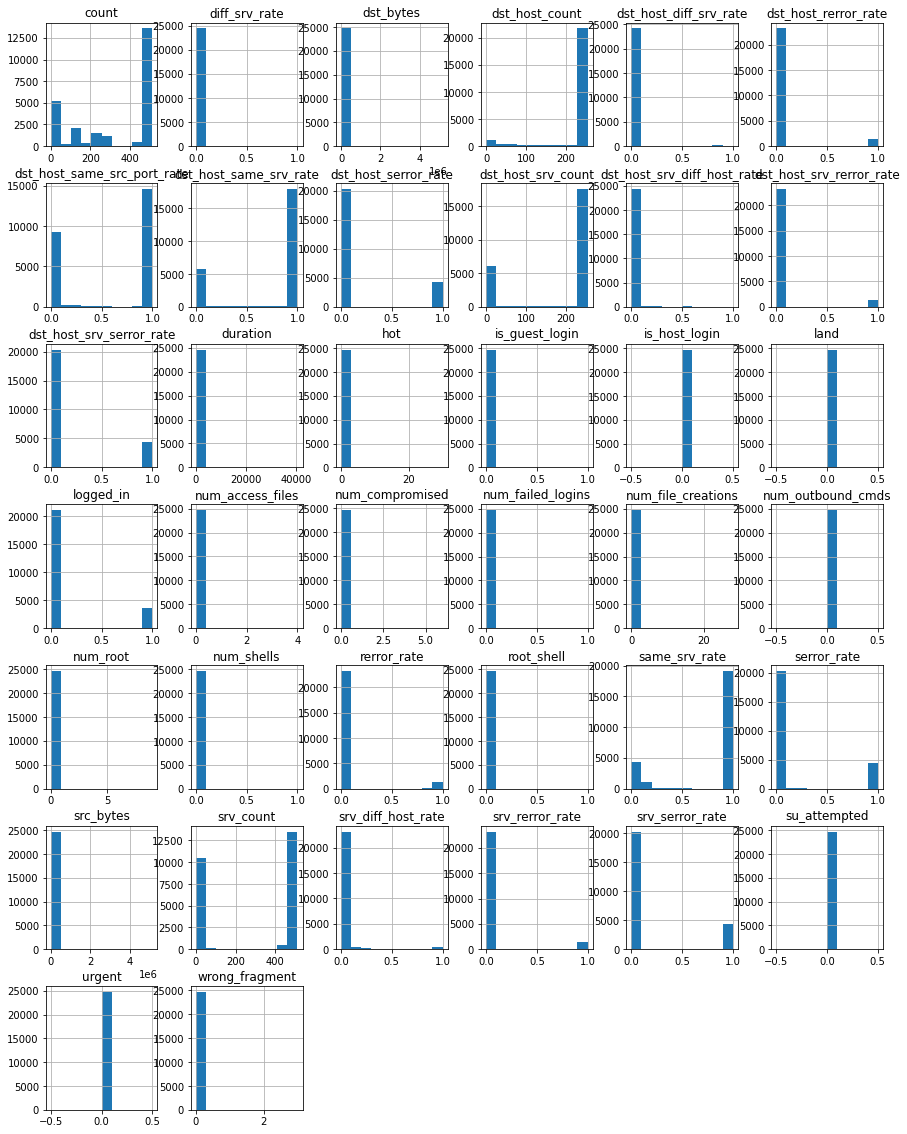

In [0]:
import matplotlib.pyplot as plt
_ = features.hist(figsize=(15, 20))

In [0]:
# from sklearn.preprocessing import StandardScaler
# features = pd.DataFrame(StandardScaler().fit_transform(features), columns = features.columns, index = features.index)

from sklearn.preprocessing import MinMaxScaler
features = pd.DataFrame(MinMaxScaler().fit_transform(features), columns = features.columns, index = features.index)

In [0]:
# use pandas to implement StandardScaler
# features = (features-features.mean())/(features.std())

# use pandas to implement MinMaxScaler
# features = (features-features.min())/(features.max()-features.min())

In [0]:
features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,24701.000000,24701.000000,24701.000000,24701.0,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.0,24701.0,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000
mean,0.001260,0.000349,0.000168,0.0,0.001957,0.0,0.001347,0.000121,0.147160,0.000729,0.000081,0.0,0.000630,0.000064,0.000040,0.000405,0.0,0.0,0.001619,0.650291,0.573589,0.176956,0.177043,0.057660,0.057928,0.791659,0.020295,0.030394,0.909946,0.740719,0.754085,0.030502,0.603515,0.007082,0.177017,0.177003,0.058565,0.057852
std,0.018615,0.013028,0.006608,0.0,0.042533,0.0,0.029855,0.011020,0.354273,0.012616,0.008998,0.0,0.023139,0.006515,0.006363,0.011897,0.0,0.0,0.040210,0.417812,0.482850,0.380930,0.381354,0.232097,0.232342,0.388224,0.077963,0.146119,0.256499,0.415581,0.410747,0.107896,0.481047,0.044719,0.380938,0.381413,0.231414,0.230929
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000009,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.229412,0.017647,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.180392,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000101,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.998039,0.998039,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000201,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# join all
X_train = pd.concat([features, protocol_dum,flag_dum, service_dum], axis=1)

#### Question #3:

StandardScaler (mean=0; std=1) or MinMaxScaler (range 0~1)?

Which one does make sense when we analyze packets or flows? Why?

在分析封包的情況使用minmax的標準化方式比較洽當，因為在這個資料中，連續變數幾乎都不符合常態分佈，同時minmax也適用數據較為集中的情況。


### PCA and plot

Too many dimensions, try to use PCA to redue dimensions.


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=features.shape[1])
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=106, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.explained_variance_ratio_)

[5.89204127e-01 2.12540894e-01 1.19659642e-01 2.13467629e-02
 1.91935513e-02 1.08084439e-02 7.89455039e-03 5.08251693e-03
 3.72124675e-03 2.41492430e-03 1.63741557e-03 1.24063458e-03
 8.65859639e-04 8.30586025e-04 5.99194186e-04 5.45433232e-04
 4.96340922e-04 4.28229472e-04 3.75919386e-04 2.10497337e-04
 1.84025731e-04 1.65767055e-04 1.02995699e-04 8.88948467e-05
 6.09924332e-05 5.47006211e-05 4.87538416e-05 4.47429946e-05
 3.83436715e-05 3.72322819e-05 2.11637917e-05 1.95417637e-05
 1.88004492e-05 1.72755344e-05 3.27656085e-33 3.27656085e-33
 3.27656085e-33 3.27656085e-33]


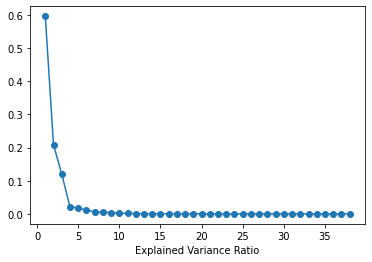

In [0]:
import matplotlib.pyplot as plt

_x = list(range(1, pca.n_features_+1))
_y = pca.explained_variance_ratio_
plt.plot(_x, _y, '-o')

plt.xlabel("PC")
plt.xlabel("Explained Variance Ratio")
plt.show()

#### Question #4:

how many dimensions are good enough?

從上圖的解釋變異量來判斷，只需要取到前四個主成份即可

In [0]:
fig = plt.figure(figsize=(8,6))

targets = ['attack.', 'normal.']
colors = ['r', 'g']

X_pca = pca.transform(features)

fig = plt.figure(figsize=(8,6))

for color, target in zip(colors, targets):
    plt.scatter(X_pca[labels == target, 0], 
                X_pca[labels == target, 1], 
                color=color, alpha=.8)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

NameError: ignored

#### Question #5:

Guess what classifier may do good job? Why?

(Logistic Regression, SVM, Tree, KNN, ...)

Logistic Regression 表現一般

SVM 則因為標準化後會受影響

Tree 不會因為做了標準化影響

knn 可以從圖形上來判斷，跟綠色交疊在一起的異常攻擊點，會分不出來

喂全部的數值變數下去，所有model accuracy都很高，因為y還是些許不平衡。在預設參數的所有模型中，SVM如猜測所說是最差，logistic一般般，knn跟decision tree表現為最好。

### Training a classifier


with all dimensions.

In [0]:
# KNN
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

start_t = time()
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
clf.fit(features, labels)
end_t = time()

y_pred = clf.predict(features_test)

print("training time:", end_t-start_t, "seconds.")
print("Training accuracy: ", accuracy_score(labels, clf.predict(features)))
print("Testing Confusion matrix: \n", confusion_matrix(labels_test, y_pred))
print("Testing Report: \n", classification_report(labels_test, y_pred))

training time: 0.7729740142822266 seconds.
Training accuracy:  0.9976924011173637
Testing Confusion matrix: 
 [[    0 12457]
 [    0  3094]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Report: 
               precision    recall  f1-score   support

     attack.       0.00      0.00      0.00     12457
     normal.       0.20      1.00      0.33      3094

    accuracy                           0.20     15551
   macro avg       0.10      0.50      0.17     15551
weighted avg       0.04      0.20      0.07     15551



In [0]:
# knn algorithm: kd-tree (speed up)
start_t = time()
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree')
clf.fit(features, labels)
end_t = time()
print("training time:", end_t-start_t, "seconds.")

training time: 0.8409137725830078 seconds.


In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

start_t = time()
lg = LogisticRegression(random_state=42)
lg.fit(features, labels)
end_t = time()

y_pred = lg.predict(features)

print("training time:", end_t-start_t, "seconds.")
print("accuracy: ", accuracy_score(labels, lg.predict(features)))
print("Report: \n", classification_report(labels, lg.predict(features)))

training time: 0.37398290634155273 seconds.
accuracy:  0.991255414760536
Report: 
               precision    recall  f1-score   support

     attack.       1.00      0.99      0.99     19854
     normal.       0.96      0.99      0.98      4847

    accuracy                           0.99     24701
   macro avg       0.98      0.99      0.99     24701
weighted avg       0.99      0.99      0.99     24701



In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(features, labels)

y_pred = dtc.predict(X_test)

print("training time:", end_t-start_t, "seconds.")
print("Training accuracy: ", accuracy_score(labels, dtc.predict(features)))
print("Testing Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Testing Report: \n", classification_report(y_test, y_pred))

training time: 20.023187160491943 seconds.
Training accuracy:  1.0
Testing Confusion matrix: 
 [[18747    30]
 [   20  4669]]
Testing Report: 
               precision    recall  f1-score   support

     attack.       1.00      1.00      1.00     18777
     normal.       0.99      1.00      0.99      4689

    accuracy                           1.00     23466
   macro avg       1.00      1.00      1.00     23466
weighted avg       1.00      1.00      1.00     23466



In [0]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(features, labels)

y_pred = svc.predict(X_test)

print("training time:", end_t-start_t, "seconds.")
print("Training accuracy: ", accuracy_score(labels, svc.predict(features)))
print("Testing Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Testing Report: \n", classification_report(y_test, y_pred))

training time: 20.023187160491943 seconds.
Training accuracy:  0.9933201084976316
Testing Confusion matrix: 
 [[18590   187]
 [    8  4681]]
Testing Report: 
               precision    recall  f1-score   support

     attack.       1.00      0.99      0.99     18777
     normal.       0.96      1.00      0.98      4689

    accuracy                           0.99     23466
   macro avg       0.98      0.99      0.99     23466
weighted avg       0.99      0.99      0.99     23466



#### Question #6:

How long would it take to train a knn model? Why?

Can you shorten it? How?

因為原本演算法的決定方式是用auto，會去嘗試各種方法決定最好的方式，花了大約20秒左右的時間。指定成kd tree則時間直接縮短為為1秒左右。

### Get testing data

Note that: we only use 10% of the download data to save your time.

In [0]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz

--2020-04-26 13:38:20--  http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1409035 (1.3M) [application/x-gzip]
Saving to: ‘corrected.gz’

corrected.gz        100%[===================>]   1.34M  1.19MB/s    in 1.1s    

2020-04-26 13:38:21 (1.19 MB/s) - ‘corrected.gz’ saved [1409035/1409035]



In [0]:
!gzip -d corrected.gz

In [0]:
!ls -al

total 119300
drwxr-xr-x 1 root root     4096 Apr 26 13:38 .
drwxr-xr-x 1 root root     4096 Apr 26 13:14 ..
drwxr-xr-x 1 root root     4096 Apr 23 16:11 .config
-rw-r--r-- 1 root root 47251540 May 16  2000 corrected
-rw-r--r-- 1 root root 74889749 Jun 26  2007 kddcup.data_10_percent
drwxr-xr-x 1 root root     4096 Apr  3 16:24 sample_data


In [0]:
# read test data
kdd_data_corrected = pd.read_csv("/content/corrected", header=None, names = col_names)

# randomly select 5% data as testing data
features_test = kdd_data_corrected.sample(frac=0.05)
print(features_test.shape)

(15551, 42)


In [0]:
# change target to 'attack'
# target
labels_test = features_test['label'].copy()
labels_test[labels_test!='normal.'] = 'attack.'
print(labels_test.value_counts())

# select features
features_test = features_test[num_features].astype(float)
# standardization or normailzation
features_test = pd.DataFrame(MinMaxScaler().fit_transform(features_test), 
                             columns = features_test.columns, index = features_test.index)

attack.    12457
normal.     3094
Name: label, dtype: int64


In [0]:
# prediction
y_pred = clf.predict(features_test)
acc = accuracy_score(labels_test, y_pred)

In [0]:
print("ACC: {}.".format(round(acc,4)))

ACC: 0.199.


#### Question #7:

You accuracy?

kNN: all features and no tune hyperparameters: 0.9267

### Try Clustering


with all dimensions using training data.

using original lables (i.e., smurf., neptune., normal., ...)

In [0]:
from sklearn.cluster import KMeans
k = 30
km = KMeans(n_clusters = k)

km.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
pd.Series(km.labels_).value_counts()

0     14041
1      2387
12     1974
2      1321
3      1036
4       979
6       574
21      449
8       202
9       189
14      169
29      158
10      150
22      137
24      118
19      110
5       103
11       78
26       75
13       75
17       69
20       58
15       52
16       46
28       42
27       39
23       29
7        20
18       11
25       10
dtype: int64

#### Question #8:

There are 30 clusters.

Could you find out which 'label' is the majority in each cluster?


In [0]:
labels = kdd_data_10percent['label'] # original lables
labels = labels.reset_index(drop=True)

clusters = pd.Series(km.labels_)
clusters = clusters.rename('cluster')

In [0]:
res = pd.concat([labels, clusters], axis=1)

for c in range(0, 30):
  print('Cluster ', c, ' labels:')
  print(res[res.cluster == c].label.value_counts())

Cluster  0  labels:
smurf.     14039
normal.        2
Name: label, dtype: int64
Cluster  1  labels:
neptune.    2387
Name: label, dtype: int64
Cluster  2  labels:
normal.    1250
back.        70
phf.          1
Name: label, dtype: int64
Cluster  3  labels:
neptune.      1029
portsweep.       6
satan.           1
Name: label, dtype: int64
Cluster  4  labels:
normal.    979
Name: label, dtype: int64
Cluster  5  labels:
normal.      90
pod.          8
smurf.        3
satan.        1
teardrop.     1
Name: label, dtype: int64
Cluster  6  labels:
normal.    574
Name: label, dtype: int64
Cluster  7  labels:
normal.    20
Name: label, dtype: int64
Cluster  8  labels:
normal.    177
back.       25
Name: label, dtype: int64
Cluster  9  labels:
normal.    187
satan.       2
Name: label, dtype: int64
Cluster  10  labels:
normal.          145
guess_passwd.      5
Name: label, dtype: int64
Cluster  11  labels:
normal.     60
ipsweep.     8
smurf.       5
satan.       2
nmap.        2
pod.         1


#### Question #9:

How do you name a cluster by the labels?

What if the label in a cluster has no majority?


主要會看那一群中的最多數量為主，將他命為那個類別

如果沒有majority，可能是分錯或是分太細，沒辦法給予好的類別，可以將cluster的數量減少看看

#### Question #10:

Now you may go back to pervious cells to check if what you can improve.

List  what have you done right here.

- categorical variables: One-hot encoding
- PCA down dimensions
- Try other classifier like SVM, Decision Tree
- Clustering: kmeans
- Remove redudant variable like `land`, `su_attempted`, `num_outbound_cmds`, `is_host_login`
- tuning hyperparameters

In [0]:
# feature selection

# delete `land`, `su_attempted`, `num_outbound_cmds`, `is_host_login`

num_features = [
    "duration","src_bytes",
    "dst_bytes","wrong_fragment","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","num_root",
    "num_file_creations","num_shells","num_access_files","is_guest_login",
    "count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

features = kdd_data_10percent[num_features].astype(float)

features = pd.concat([features, protocol_dum, flag_dum, service_dum], axis=1)
features.describe()
# 加了one-hot後維度變成106

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,icmp,tcp,udp,REJ,RSTO,RSTOS0,RSTR,...,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pop_2,pop_3,printer,private,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
count,24701.000000,2.470100e+04,2.470100e+04,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,...,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000,24701.000000
mean,50.949152,1.790995e+03,8.678512e+02,0.005870,0.040403,0.000121,0.147160,0.004372,0.000081,0.005668,0.001781,0.000040,0.001619,0.001619,332.648476,293.530626,0.176956,0.177043,0.057660,0.057928,0.791659,0.020295,0.030394,232.036314,188.883406,0.754085,0.030502,0.603515,0.007082,0.177017,0.177003,0.058565,0.057852,0.575888,0.384114,0.039998,0.054532,0.001215,0.000040,0.001660,...,0.129752,0.000162,0.000202,0.000202,0.000283,0.000162,0.000162,0.000243,0.000202,0.000283,0.000162,0.000162,0.000162,0.000162,0.000121,0.000121,0.000121,0.000729,0.014210,0.000202,0.000526,0.000121,0.223837,0.000162,0.000081,0.000364,0.019716,0.000405,0.000162,0.000162,0.000081,0.000486,0.000850,0.000324,0.000081,0.001174,0.000081,0.000081,0.000283,0.000202
std,752.959141,6.690779e+04,3.405586e+04,0.127598,0.895641,0.011020,0.354273,0.075696,0.008998,0.208251,0.182418,0.006363,0.047588,0.040210,213.083975,246.253679,0.380930,0.381354,0.232097,0.232342,0.388224,0.077963,0.146119,65.407145,105.973108,0.410747,0.107896,0.481047,0.044719,0.380938,0.381413,0.231414,0.230929,0.494218,0.486395,0.195959,0.227069,0.034830,0.006363,0.040708,...,0.336037,0.012725,0.014226,0.014226,0.016832,0.012725,0.012725,0.015584,0.014226,0.016832,0.012725,0.012725,0.012725,0.012725,0.011020,0.011020,0.011020,0.026985,0.118358,0.014226,0.022936,0.011020,0.416823,0.012725,0.008998,0.019085,0.139025,0.020117,0.012725,0.012725,0.008998,0.022036,0.029146,0.017994,0.008998,0.034245,0.008998,0.008998,0.016832,0.014226
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [0]:
X_train = pd.DataFrame(MinMaxScaler().fit_transform(features), 
                        columns = features.columns, index = features.index)

y_train = kdd_data_10percent['label'].copy()
y_train[labels!='normal.'] = 'attack.'
print(y_train.value_counts())

# change target to 'attack'
# target
y_test = features_test['label'].copy()
y_test[y_test!='normal.'] = 'attack.'
print(y_test.value_counts())


X_test = features_test[num_features].astype(float)
X_test = pd.concat([X_test,
                    pd.get_dummies(features_test['protocol_type']),
                    pd.get_dummies(features_test['flag']),
                    pd.get_dummies(features_test['service'])],
                   axis = 1)

# standardization or normailzation
X_test = pd.DataFrame(MinMaxScaler().fit_transform(X_test), 
                             columns = X_test.columns, index = X_test.index)

attack.    19879
normal.     4822
Name: label, dtype: int64
attack.    12542
normal.     3009
Name: label, dtype: int64


In [0]:
start_t = time()
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
clf.fit(X_train, y_train)
end_t = time()

print("training time:", end_t-start_t, "seconds.")
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train)))

training time: 1.3874216079711914 seconds.
Training accuracy:  0.9091534755677908


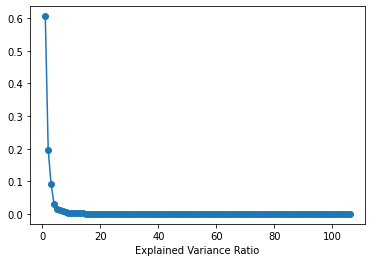

In [0]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

_x = list(range(1, pca.n_features_+1))
_y = pca.explained_variance_ratio_
plt.plot(_x, _y, '-o')

plt.xlabel("PC")
plt.xlabel("Explained Variance Ratio")
plt.show()

In [0]:
X_train_pca = pca.fit_transform(X_train)[:, :5]

start_t = time()
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
clf.fit(X_train_pca, y_train)
end_t = time()

print("training time:", end_t-start_t, "seconds.")
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train_pca)))

training time: 0.19696259498596191 seconds.
Training accuracy:  0.9976114327355168


In [0]:
y_pred = clf.predict(X_test)
print("Testing Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Testing Report: \n", classification_report(y_test, y_pred))

In [0]:
X_test.shape

(15551, 108)

In [0]:
X_train.shape

(24701, 106)